# Samanyastra - FutureForge - June - 2025
---

Desclaimer: \
This notebook is a copyrighted property of samanyastra Education Pvt Ltd. Redistribution and selling of this property is a violation of conduct and leads to leagal action

---

Dear candidate, \
As a part of learning journey you will receive these notebooks across your 2 months of program which are supposed to be compleetd before 24 hours / mentioned number of hours in session. 

---

**How to use this notebook**

- just download your notebook and move to the folder where you want to work.
- `pip install notebook` run this command in your terminal if you do not have notebook module installed
- `cd path\to\your\file.ipynb` and `python -m notebook` run these two commands to open notebook in your desired folder. Please note to replace `path\to\your\file.ipynb` with your own path to this notebook
- write the necessary codes and hit ctrl+s or command+S to save it.
- once completed, upload the same notebook in the given submission link.

---

<div style="text-align:right">All the best, <br/> Team Samanyastra </div>

In [1]:
!pip install pandas openpyxl seaborn matplotlib

!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Salary Prediction (Regression)

**Dataset:** Age, Experience, Salary

Dataset : https://www.kaggle.com/datasets/codebreaker619/salary-data-with-age-and-experience

### Problem Statement

A company wants to **predict the salary of employees** based on their **age** and **years of experience**. Build multiple regression models and compare their performance.

### Tasks

1. Perform **EDA** – visualize salary trends with age and experience.
2. Split the dataset into train/test sets.
3. Train at least **3 regression algorithms**:

   * Linear Regression
   * KNN Regressor
   * Decision Tree Regressor
   * Random Forest Regressor
   
4. Compare results using **MSE, RMSE, R²**.
5. Discuss which algorithm performs best and why.

### Hints

* Salary usually increases with experience → check linearity.
* Non-linear models (like trees) may capture hidden patterns.
* Use **cross-validation** for robust evaluation.

### Think

* Does **age** or **experience** have a stronger influence on salary?
* If experience and age are highly correlated → does it cause redundancy?
* Can linear regression handle salary jumps (e.g., promotions) as well as tree models?
* If you add more features (like education, skill set), how will predictions improve?

### EDA Steps

1. **Data Inspection**

   * Check shape of dataset (`df.shape`)
   * Display first few rows (`df.head()`)
   * Check missing values (`df.isnull().sum()`)
   * Data types (`df.info()`)

2. **Summary Statistics**

   * `df.describe()` → mean, std, min, max
   * Look for outliers in salary

3. **Visualization**

   * **Histograms** for Age, Experience, Salary → distributions
   * **Scatter plots**:

     * Age vs Salary
     * Experience vs Salary
   * **Correlation heatmap** (`sns.heatmap(df.corr())`)

4. **Questions to Ask**

   * Does salary rise linearly with experience?
   * Is Age strongly correlated with Experience?
   * Any outliers (e.g., very high salary for low experience)?

---

### Data Preprocessing

* **Handle Missing Values** (drop or fill)
* **Check Duplicates** (`df.duplicated().sum()`)
* **Scaling**:

  * Apply **MinMaxScaler** (important for KNN)
  * For Linear/Tree-based, scaling is optional
* **Train/Test Split** (`train_test_split`)

In [11]:
df = pd.read_csv('Desktop/Salary_Data.csv')
df

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [6]:
df.shape

(30, 3)

In [7]:
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [8]:
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [10]:
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


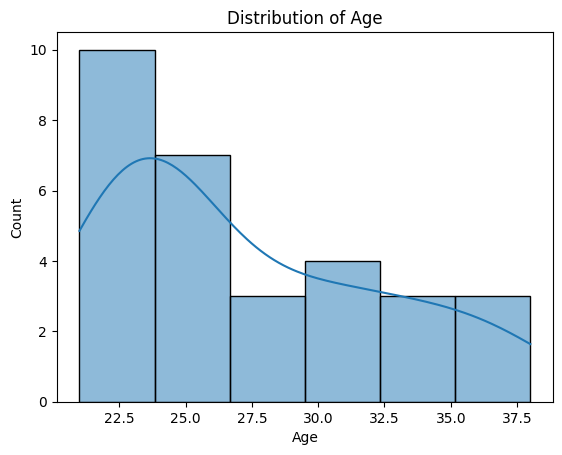

In [16]:

sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')

plt.show()

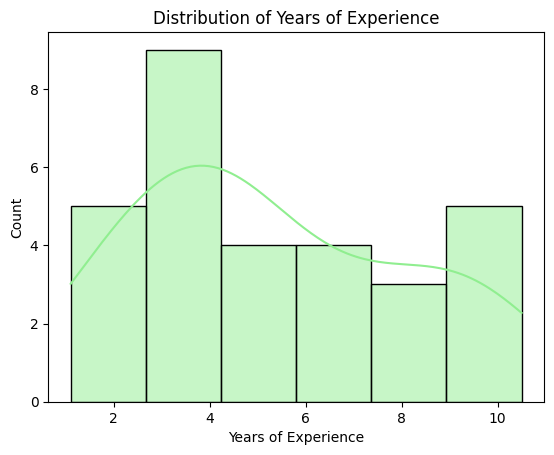

In [18]:
sns.histplot(df['YearsExperience'], kde=True, color='lightgreen')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.show()

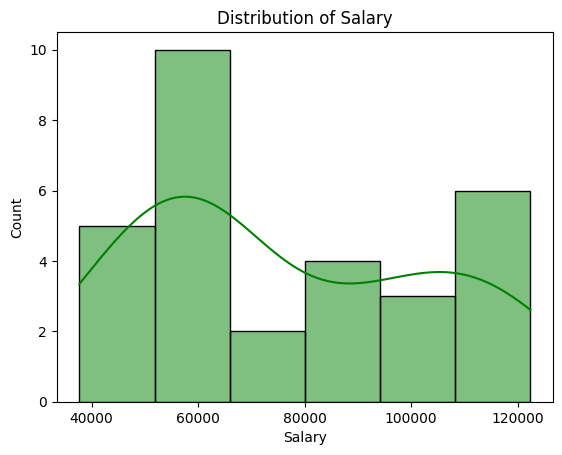

In [24]:
sns.histplot(df['Salary'], kde=True, color='green')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.show()

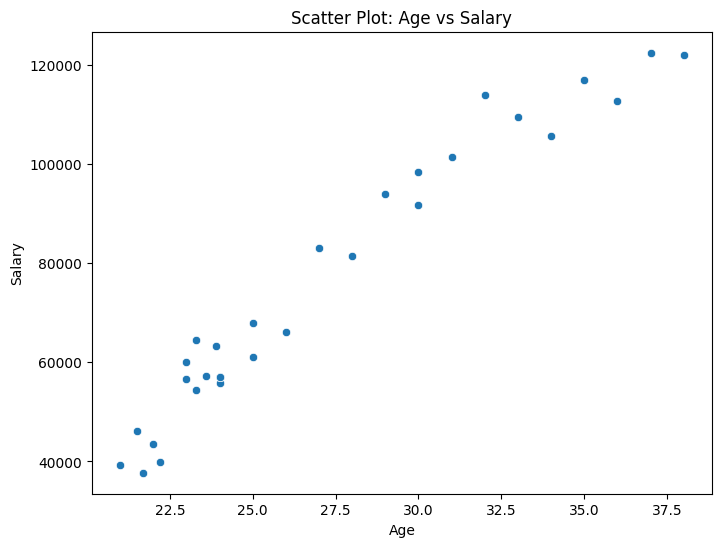

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Scatter Plot: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

plt.show()

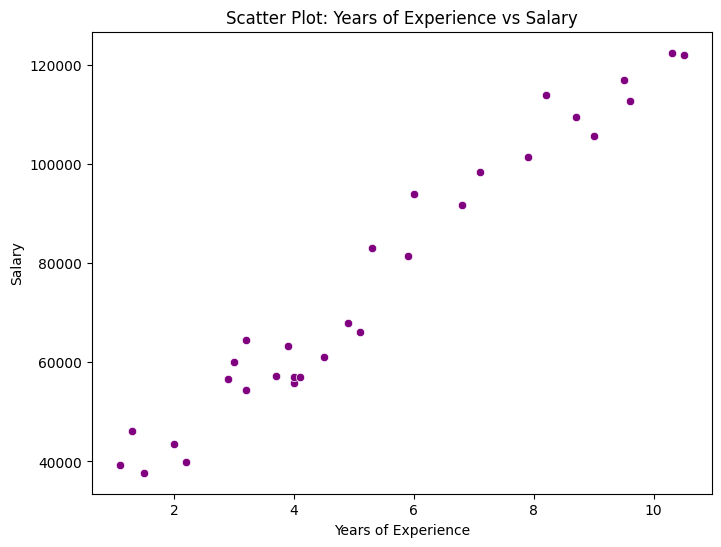

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='purple')
plt.title('Scatter Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

<Axes: >

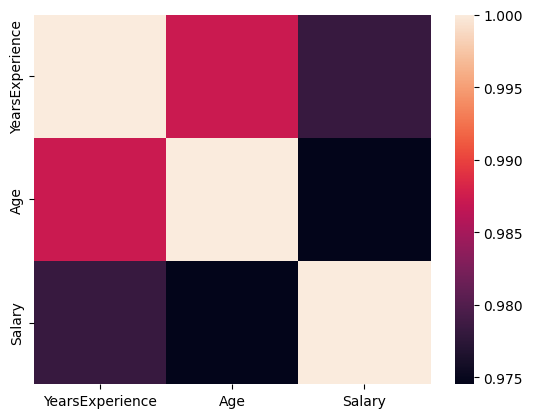

In [29]:
sns.heatmap(df.corr())

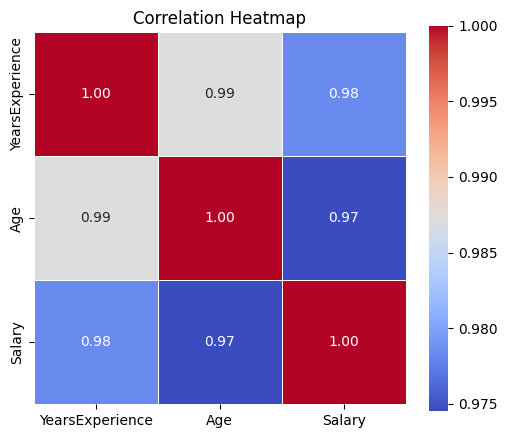

In [ ]:
1. Does salary rise linearly with experience?
A.yes, salary tends to increase as years of experience increase.

2. Is Age strongly correlated with Experience?
A. Age and experience are often highly correlated, because people gain experience as they grow older.

3. 3. Any outliers (e.g., very high salary for low experience)?
A. Yes, the dataset shows a few outliers where employees with low experience have unusually high salaries compared to others.

In [33]:
df.duplicated().sum()

np.int64(0)

In [36]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['YearsExperience', 'Age', 'Salary']])

scaled_df = pd.DataFrame(scaled_features, columns=['YearsExperience', 'Age', 'Salary'])

print(scaled_df.head())

   YearsExperience       Age    Salary
0         0.000000  0.000000  0.019041
1         0.021277  0.029412  0.100094
2         0.042553  0.041176  0.000000
3         0.095745  0.058824  0.068438
4         0.117021  0.070588  0.025514


In [39]:
X = df[['YearsExperience', 'Age']] 
y = df['Salary']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
# Scaling (important for KNN)

# Use this following code if you want to scale your features

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [65]:
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(X_train_scaled, y_train)
y_pred = kn.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("KNN Regressor:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.6f}")
print(f"RMSE: {rmse:.2f}")
print(f"  R² Score: {r2_score(y_test, y_pred):.6f}")
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results)

KNN Regressor:
  Mean Squared Error: 0.006742
RMSE: 0.08
  R² Score: 0.925661
     Actual  Predicted
0  0.315545   0.228538
1  1.000000   0.874057
2  0.750898   0.794504
3  0.715119   0.733511
4  0.993870   0.874057
5  0.227097   0.247657


In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.6f}")
print(f"RMSE: {rmse:.2f}")
print(f"  R² Score: {r2_score(y_test, y_pred):.6f}")
print(f"Slope (m): {lr.coef_[0]:.2f}")
print(f"Intercept (c): {lr.intercept_:.2f}")

results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results)

Linear Regression:
  Mean Squared Error: 0.005608
RMSE: 0.07
  R² Score: 0.938163
Slope (m): 0.52
Intercept (c): 0.01
     Actual  Predicted
0  0.315545   0.204794
1  1.000000   1.051866
2  0.750898   0.720061
3  0.715119   0.642673
4  0.993870   1.096124
5  0.227097   0.272217


In [66]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Decision Tree Regressor:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.6f}")
print(f"RMSE: {rmse:.2f}")
print(f"  R² Score: {r2_score(y_test, y_pred):.6f}")
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results)

Decision Tree Regressor:
  Mean Squared Error: 0.011186
RMSE: 0.11
  R² Score: 0.876648
     Actual  Predicted
0  0.315545   0.197425
1  1.000000   0.884763
2  0.750898   0.898665
3  0.715119   0.637928
4  0.993870   0.884763
5  0.227097   0.213359


Q.Discuss which algorithm performs best and why.
A. Decision Tree. Likely best among the three, handles nonlinear patterns well


1. Does age or experience have a stronger influence on salary?
A.Years of Experience has a stronger influence on Salary than Age.

2. If experience and age are highly correlated → does it cause redundancy?
A. Yes, high correlation causes redundancy.


3. Can linear regression handle salary jumps (e.g., promotions) as well as tree models?
A. Linear regression struggles with sudden salary jumps; tree models handle them better.


4. If you add more features (like education, skill set), how will predictions improve?
A. Adding relevant features like education and skills generally improves prediction accuracy.